# pyds.tools

- compilations of tools in python

## pyds.tools.readcol

* read the columns with formats from ascii data

In [1]:
""" Check the ascii data """
import os

fdir = os.environ['PYTHONDATA']
fname = fdir+'test_usr'

testf = open(fname,'r')
text = testf.readlines(); testf.close()

for itext in text:
    print itext

12.3    4134    232.    23d3    asdf

142.    233     1d12    NAN     dfds

2342.   12.2    2342.   12e1    zxcve

211.    123     32432.  32423   kas

423.    454     232     2321.   cxi



In [2]:
""" read columns of interest """
import os
from pyds.tools import readcol

fdir = os.environ['PYTHONDATA']
fname = fdir+'test_usr'

a,b,c = readcol(fname,format=['i','x','x','f','s'],nskip=1)

print a,b,c

[ 142 2342  211  423] [    nan    120.  32423.   2321.] ['dfds' 'zxcve' 'kas' 'cxi']


## pyds.tools.axpos

* set the multiplots in a more intutive and easy way.

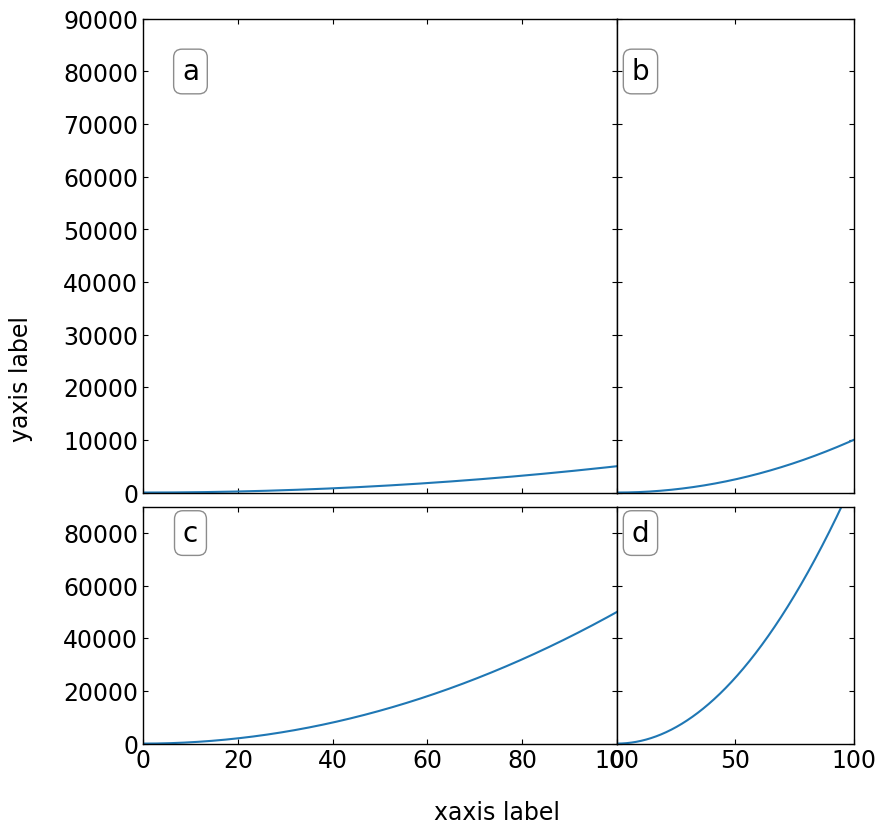

In [3]:
""" First method of drawing multiplots: 
    this can be used any number of size elements (i.e. pltxs=[...],pltys=[...])
    - Using 
        >>> axset = axpos(...)
        >>> plt.figure(...)
        >>> ax = plt.axes(axset.pos(...))
"""
import matplotlib.pyplot as plt
import numpy as np
from pyds.tools import axpos

%matplotlib inline

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
xlim = [0,100]
ylim = [0,90000]
x = np.linspace(0,100,5000)
y1 = x**2/2.
y2 = x**2
y3 = x**2*5
y4 = x**2*10

# initialize the configuration
axset = axpos(22,pltx0=[30,10],plty0=[20,10],pltxs=[100,50],pltys=[100,50],pltxw=0,pltyw=3)

# axes positions
# [ 1,1  1,2 
#   2,1  2,2 ]

# generate figure
plt.figure(figsize=(9,9*axset.winys/axset.winxs))

# first plot
ax1  = plt.axes(axset.pos(221))
ax1.plot(x,y1)
ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])
ax1.text(10, 80000, "a", ha="center", va="center", size=20,
        bbox=bbox_props)
plt.setp(ax1.get_xticklabels(), visible=False)

# second plot
ax2  = plt.axes(axset.pos(222))
ax2.plot(x,y2)
ax2.set_xlim(xlim[0], xlim[1])
ax2.set_ylim(ylim[0], ylim[1])
ax2.text(10, 80000, "b", ha="center", va="center", size=20,
        bbox=bbox_props)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

# third plot
ax3  = plt.axes(axset.pos(223))
ax3.plot(x,y3)
ax3.set_xlim(xlim[0], xlim[1])
ax3.set_ylim(ylim[0], ylim[1])
ax3.text(10, 80000, "c", ha="center", va="center", size=20,
        bbox=bbox_props)

# forth plot
ax4  = plt.axes(axset.pos(224))
ax4.plot(x,y4)
ax4.set_xlim(xlim[0], xlim[1])
ax4.set_ylim(ylim[0], ylim[1])
ax4.text(10, 80000, "d", ha="center", va="center", size=20,
        bbox=bbox_props)
plt.setp(ax4.get_yticklabels(), visible=False)

# set the figure label
plt.annotate('yaxis label',(0.01,0.6),xycoords='figure fraction',rotation='vertical')
plt.annotate('xaxis label',(0.49,0.02),xycoords='figure fraction')

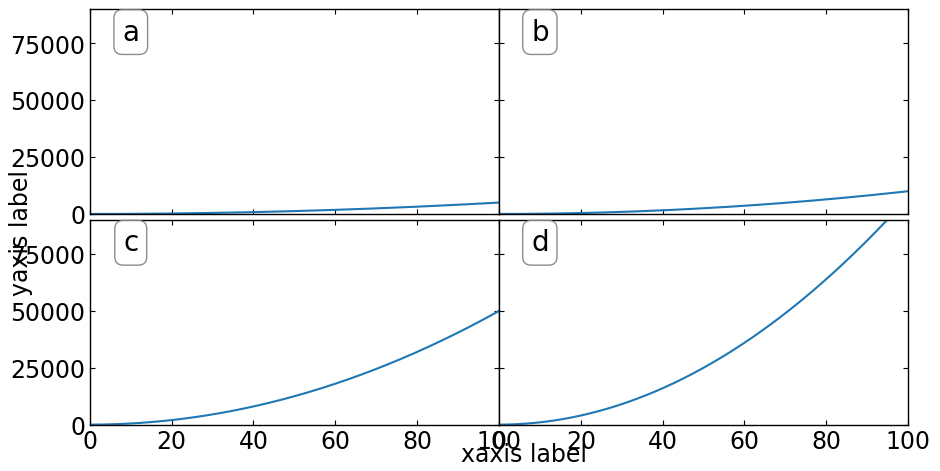

In [4]:
""" Second method of drawing multiplots: 
    All plosts should be in same size (i.e. pltxs=single number, pltys=single number)
    - Using 
        >>> axset = axpos(...)
        >>> fig =plt.figure(...)
        >>> ax=fig.add_subplot(...)
        >>> axpos = axset.adjust_subplots(fig)
"""
import matplotlib.pyplot as plt
import numpy as np
from pyds.tools import axpos

%matplotlib inline

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
xlim = [0,100]
ylim = [0,90000]
x = np.linspace(0,100,5000)
y1 = x**2/2.
y2 = x**2
y3 = x**2*5
y4 = x**2*10

# initialize the configuration
axset = axpos(22,pltx0=[30,10],plty0=[20,10],pltxs=200,pltys=100,pltxw=0,pltyw=3)

fig = plt.figure(figsize=(9,9*axset.winys/axset.winxs))

# first plot
ax1  = fig.add_subplot(221)
ax1.plot(x,y1)
ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])
ax1.text(10, 80000, "a", ha="center", va="center", size=20,
        bbox=bbox_props)
plt.setp(ax1.get_xticklabels(), visible=False)

# second plot
ax2  = fig.add_subplot(222, sharey=ax1)
ax2.plot(x,y2)
ax2.set_xlim(xlim[0], xlim[1])
ax2.set_ylim(ylim[0], ylim[1])
ax2.text(10, 80000, "b", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

# third plot
ax3  = fig.add_subplot(223, sharex=ax1)
ax3.plot(x,y3)
ax3.set_xlim(xlim[0], xlim[1])
ax3.set_ylim(ylim[0], ylim[1])
ax3.text(10, 80000, "c", ha="center", va="center", size=20,
        bbox=bbox_props)

# forth plot
ax4  = fig.add_subplot(224, sharex=ax2, sharey=ax3)
ax4.plot(x,y4)
ax4.set_xlim(xlim[0], xlim[1])
ax4.set_ylim(ylim[0], ylim[1])
ax4.text(10, 80000, "d", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax4.get_yticklabels(), visible=False)

# set the figure label
plt.annotate('yaxis label',(0.01,0.6),xycoords='figure fraction',rotation='vertical')
plt.annotate('xaxis label',(0.49,0.02),xycoords='figure fraction')

# adjust margin
axset.subplots_adjust(fig)